In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import os
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import wave
import pandas as pd
import visualkeras
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

2024-03-02 14:07:38.689002: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 14:07:38.689045: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 14:07:38.690720: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 14:07:38.700050: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-02 14:07:39.883885: W tensorflow/compiler/tf2

In [2]:
from tensorflow.keras.utils import plot_model

In [3]:
vgg_model = tf.keras.models.load_model('./model_wordrep/')

2024-03-02 14:07:41.341106: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 14:07:41.363994: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 14:07:41.364401: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
# plot_model(vgg_model,

#            to_file='prolongation_model_plot.png',

#            show_shapes=True,

#            show_layer_names=True)

In [5]:
desired_layer = 'conv2d_4'

In [6]:
activation_model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer(desired_layer).output)

2024-03-02 14:07:45.723085: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-03-02 14:07:45.843320: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 1s 671ms/step


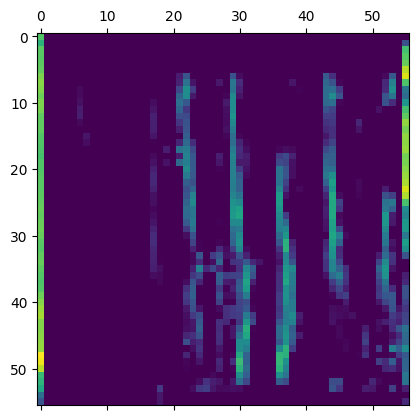

In [7]:
img_path = '/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_1_13_stutter.jpg'
# img_path = '/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_37_stutter.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.vgg16.preprocess_input(x)

# Get the activations
activations = activation_model.predict(x)

# Visualize the activation map
plt.matshow(activations[0, :, :, 0], cmap='viridis') # You can change the index (0) to visualize different feature maps
plt.show()

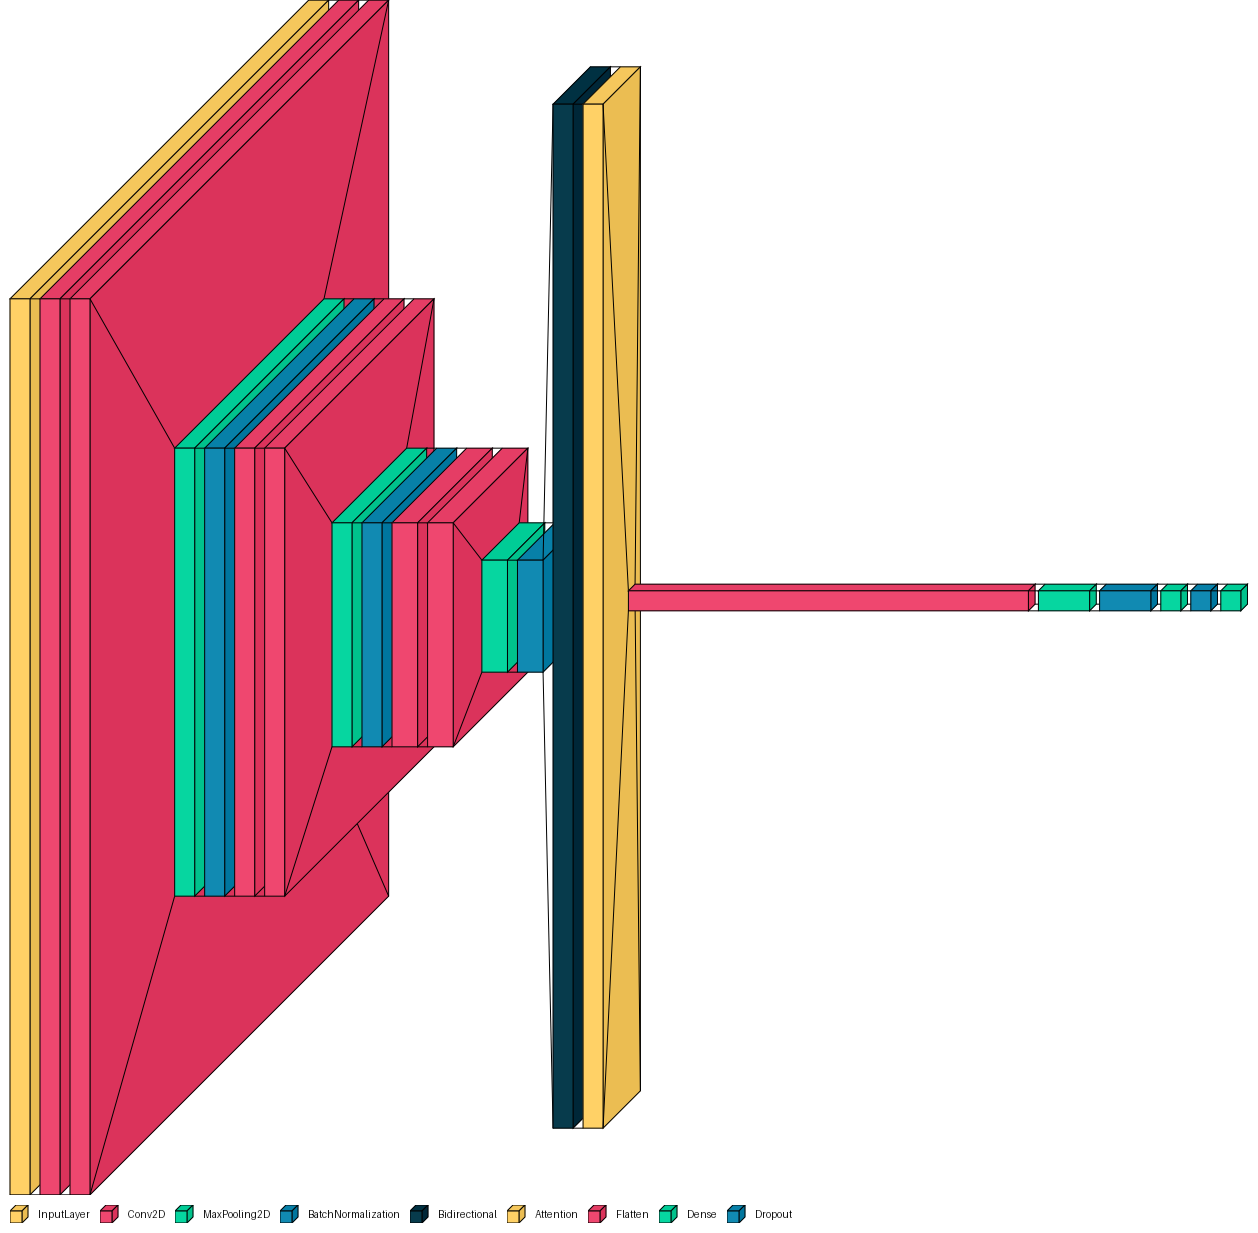

In [34]:
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input, AveragePooling2D, Attention, Reshape, TimeDistributed, Bidirectional, LSTM, GRU
visualkeras.layered_view(vgg_model, type_ignore=[TimeDistributed], legend=True)